<a href="https://colab.research.google.com/github/alessandrotofani/Tesi_magistrale/blob/master/2_Correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [2]:
!pip install --quiet fastai==2.2.5

     |████████████████████████████████| 194kB 9.2MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 776.8MB 21kB/s 
     |████████████████████████████████| 12.8MB 206kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.


In [3]:
import sys 
sys.path.append('/content/drive/MyDrive/Tesi_magistrale/Tesi_magistrale')
import mf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Tesi_magistrale/Dataset/IEEE/Output/data.csv')
data = mf.new_processing(data)

In [5]:
correlation_data = data.select_dtypes(exclude=['object']).copy()

In [25]:
def get_col_by_sign(correlation_data, sign):
  cols = []
  for col in correlation_data.columns:
    for signature in sign:
      if signature in col:
        cols.append(col)
  return cols

def get_correlation(correlation_data, cols = None):
  if cols is None:
    data = correlation_data.copy()
  else:
    data = correlation_data[cols].copy()
  corr_matrix = data.corr()
  mf.corr_matrix_plot(data, corr_matrix)
  return corr_matrix

def get_highest_correlation(correlation_data, corr_matrix, tresh=0.95, get_col=False):
  highest_corr = mf.highest_correlations(correlation_data, corr_matrix, tresh)
  highest_corr = highest_corr.unstack(level = 1)
  corr_d, corr_list = mf.corr_dict(highest_corr)
  if not get_col:
    return corr_d, corr_list
  else:
    cols = []
    for col in corr_d:
      if col[0] not in cols:
        cols.append(col[0])
      if col[1] not in cols:
        cols.append(col[1])
    return corr_d, corr_list, cols

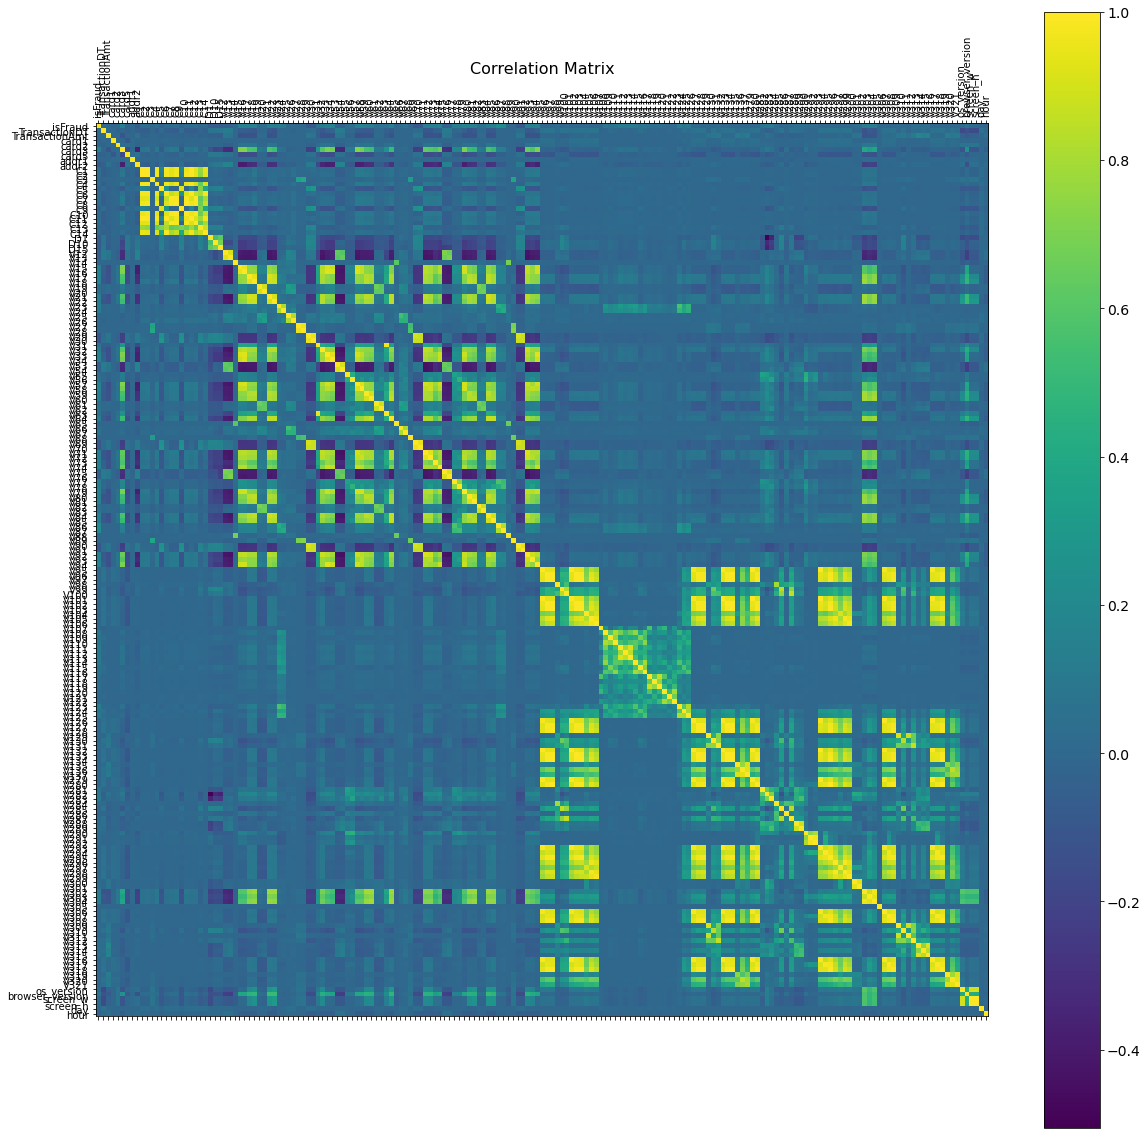

In [10]:
# corr_matrix = correlation_data.corr()
# mf.corr_matrix_plot(correlation_data, corr_matrix)
corr_matrix = get_correlation(correlation_data)

In [15]:
highest_correlation_dict, highest_correlation_list, highest_correlation_columns = get_highest_correlation(correlation_data, corr_matrix, get_col=True)
print('Highest correlation dictionary:', highest_correlation_dict)
print('Highest correlation list:', highest_correlation_list)
print('Highest correlation columns:', highest_correlation_columns)

Highest correlation dictionary: {('C1', 'C11'): 0.9965147298588114, ('C1', 'C6'): 0.9822382383028059, ('C10', 'C1'): 0.9582027839153787, ('C10', 'C2'): 0.9706252136858096, ('C10', 'C8'): 0.9969706033331811, ('C11', 'C10'): 0.9560564822733372, ('C11', 'C6'): 0.9911054566491464, ('C12', 'C10'): 0.9838181115628221, ('C12', 'C7'): 0.9994894734805015, ('C14', 'C1'): 0.9517624385737068, ('C14', 'C11'): 0.9624662701268001, ('C2', 'C1'): 0.9950895656325166, ('C2', 'C4'): 0.9721346467766997, ('C2', 'C11'): 0.9938978437353125, ('C2', 'C6'): 0.9748459061079396, ('C4', 'C1'): 0.9678005260667668, ('C4', 'C10'): 0.9524664421943252, ('C4', 'C11'): 0.9745470947130076, ('C6', 'C4'): 0.9623192637430509, ('C6', 'C14'): 0.9842013454098356, ('C7', 'C10'): 0.9850617425777036, ('C8', 'C1'): 0.9677462580913045, ('C8', 'C4'): 0.9599957759537, ('C8', 'C11'): 0.9627214675833016, ('C8', 'C2'): 0.9758630281929263, ('C8', 'C7'): 0.9829836114240454, ('C8', 'C12'): 0.9830271793527467, ('V101', 'V306'): 0.978806944527

In [ ]:
# highest_corr_data = correlation_data[cols].copy()
# corr_matrix_highest = highest_corr_data.corr()
# mf.corr_matrix_plot(highest_corr_data, corr_matrix_highest)

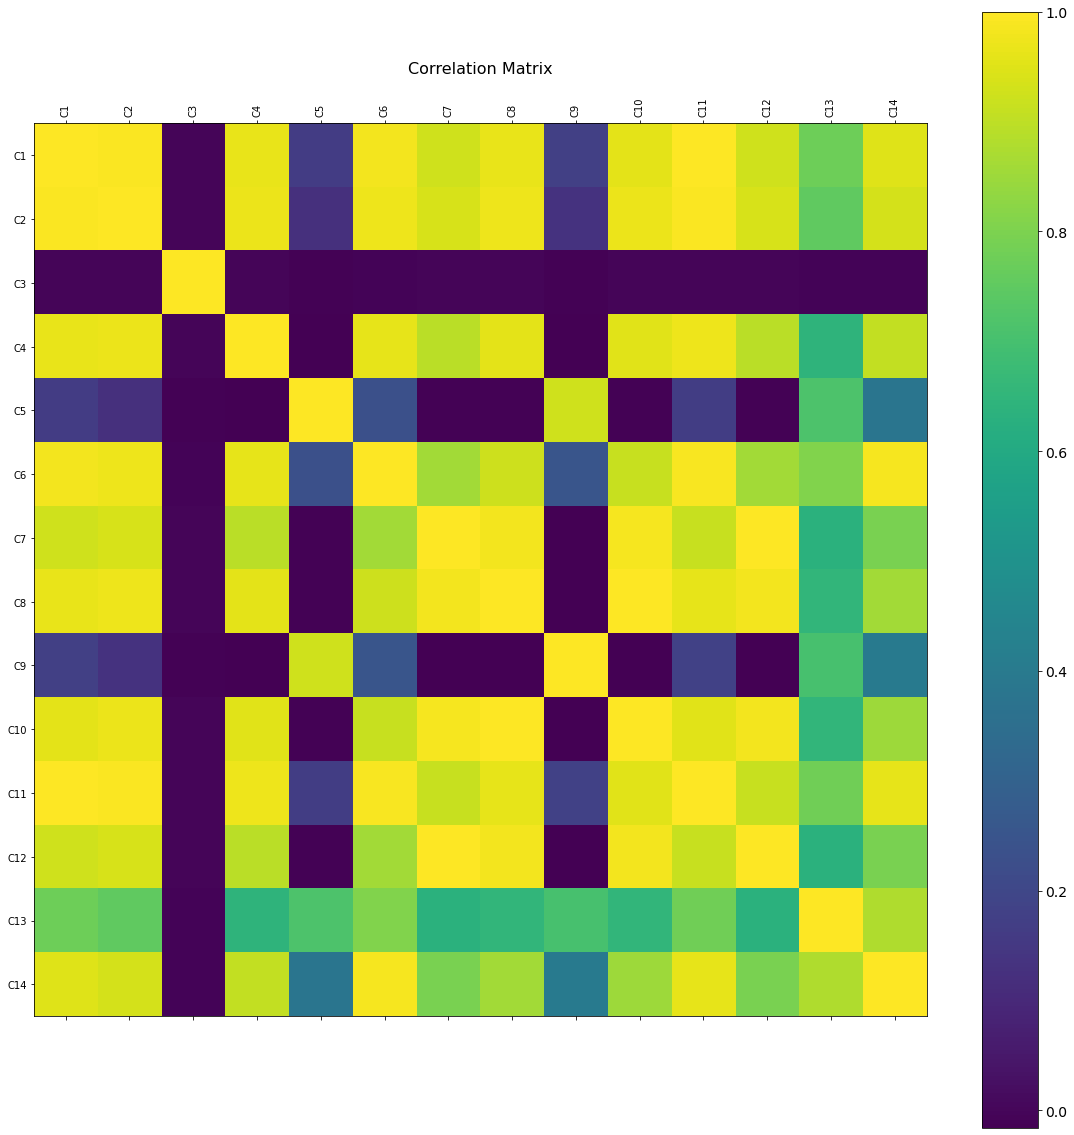

In [26]:
cols = get_col_by_sign(correlation_data, sign=['C'])
corr_matrix = get_correlation(correlation_data, cols = cols)

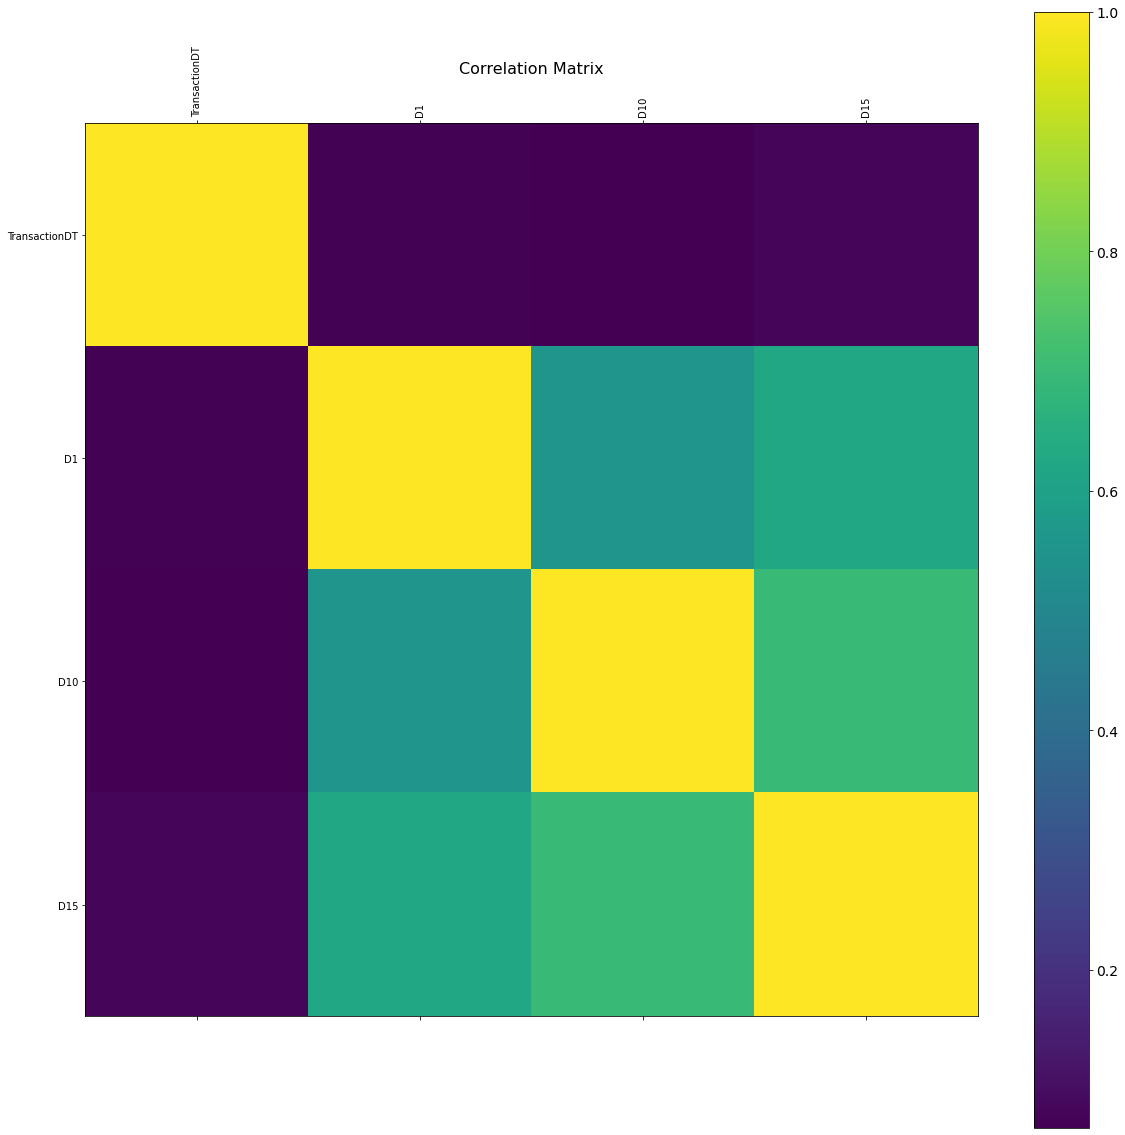

In [17]:
cols = get_col_by_sign(correlation_data, sign=['D'])
corr_matrix = get_correlation(correlation_data, cols = cols)

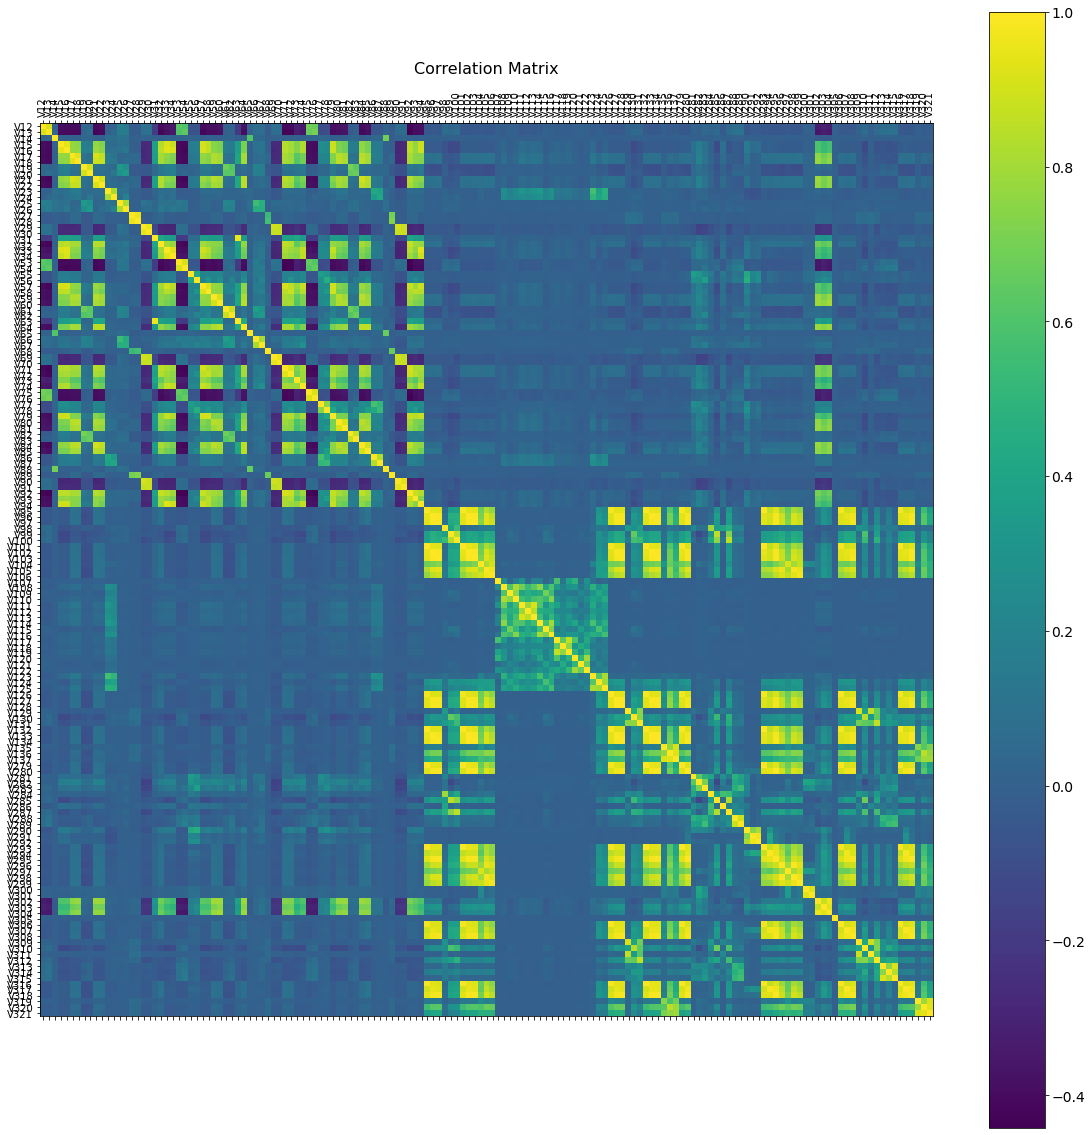

In [18]:
cols = get_col_by_sign(correlation_data, sign=['V'])
corr_matrix = get_correlation(correlation_data, cols = cols)

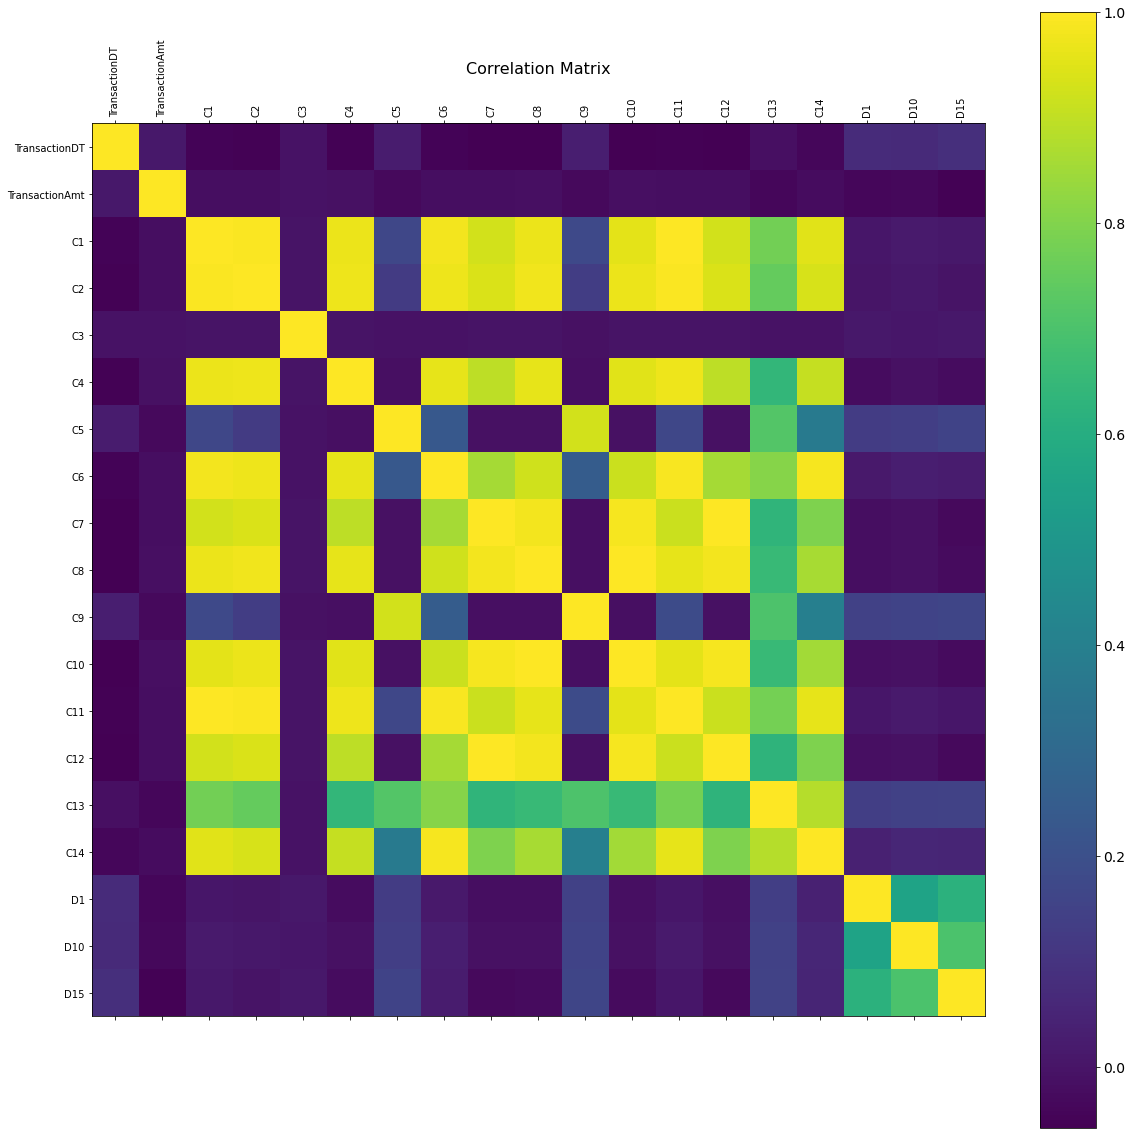

In [31]:
cols = get_col_by_sign(correlation_data, sign=['C','D','TransactionA'])
corr_matrix = get_correlation(correlation_data, cols = cols)